In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
# Ridge?

pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])


In [4]:
from sklearn.model_selection import cross_validate
# cross_validate?

pipeline.set_params(ridge__alpha=1)

cv_results = cross_validate(pipeline, data_numerical, target, 
                            cv=10, return_estimator=True)

results = pd.DataFrame(cv_results)

In [5]:
# Pipeline?
# pipeline.get_params()

In [6]:
results

,fit_time,score_time,estimator,test_score
0,0.007078,0.001905,"(StandardScaler(), Ridge(alpha=1))",0.761415
1,0.004639,0.002015,"(StandardScaler(), Ridge(alpha=1))",0.806418
2,0.005490,0.002182,"(StandardScaler(), Ridge(alpha=1))",0.811895
3,0.004594,0.001772,"(StandardScaler(), Ridge(alpha=1))",0.666047
4,0.004475,0.001764,"(StandardScaler(), Ridge(alpha=1))",0.799548
5,0.004323,0.001864,"(StandardScaler(), Ridge(alpha=1))",0.768840
6,0.004641,0.001745,"(StandardScaler(), Ridge(alpha=1))",0.756386
7,0.004411,0.001869,"(StandardScaler(), Ridge(alpha=1))",0.718204
8,0.004377,0.001844,"(StandardScaler(), Ridge(alpha=1))",0.315061
9,0.004628,0.001806,"(StandardScaler(), Ridge(alpha=1))",0.786404


In [7]:
for estimator in cv_results['estimator']:
    print(max(estimator[-1].coef_))

20867.286383259503
20329.015171924762
19764.507912735222
20169.5926260805
19571.095410466438
22562.76919825587
20127.65597364394
20032.645971187612
17142.309984190524
19144.18916886907


In [8]:
# coefs_list = []
# for estimator in cv_results['estimator']:
#     for coef in estimator[-1].coef_:
#         coefs_list.append(coef)

In [9]:
# import matplotlib.pyplot as plt

# fig1, ax1 = plt.subplots()
# ax1.set_title("coefs_boxpot")
# ax1.boxplot(coefs_list)

# plt.show()

In [10]:
coefs_list = []
for estimator in cv_results['estimator']:
    coefs_list.append(estimator[-1].coef_)

coefs = pd.DataFrame(coefs_list, columns=range(24))

<AxesSubplot:>

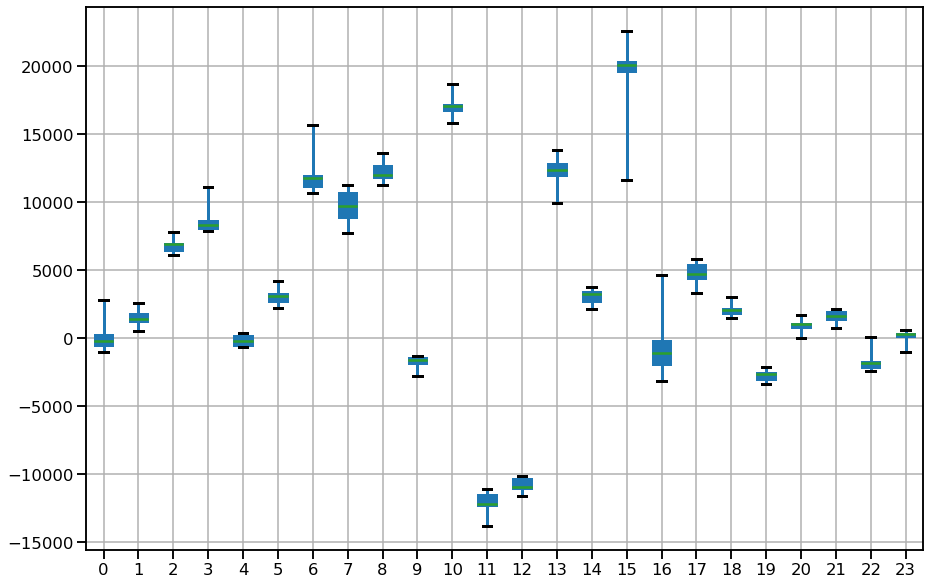

In [11]:
coefs.boxplot(figsize=(15,10))

In [12]:
print(numerical_features[10])
print(numerical_features[15])

GrLivArea
GarageCars


In [13]:
new_data = data_numerical.drop(columns="GarageArea")

In [14]:
cv_results_2 = cross_validate(pipeline, new_data, target, 
                            cv=10, return_estimator=True)

In [15]:
coefs_list = []
for estimator in cv_results_2['estimator']:
    coefs_list.append(estimator[-1].coef_)

coefs = pd.DataFrame(coefs_list, columns=range(23))

<AxesSubplot:>

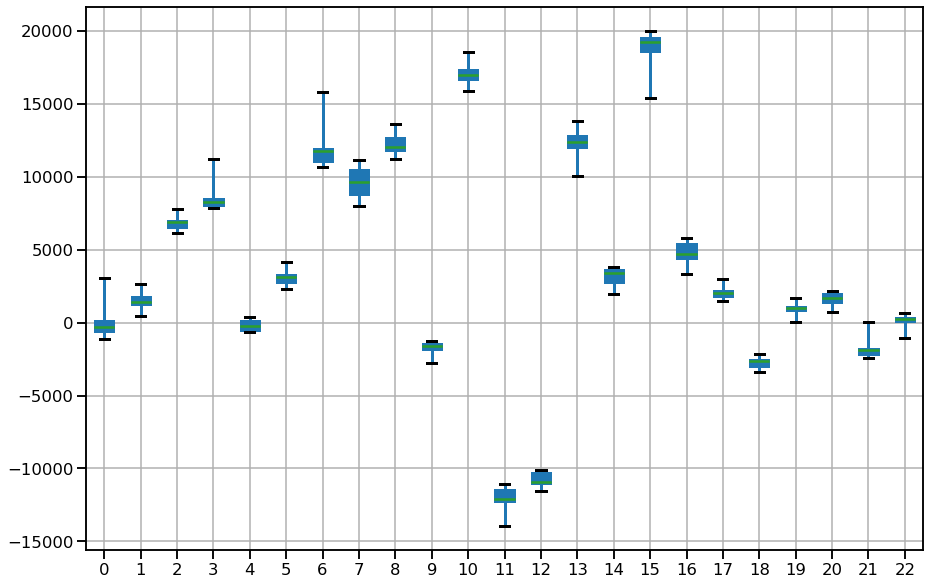

In [16]:
coefs.boxplot(figsize=(15,10))

In [17]:
numerical_features.index("GarageArea")

16

In [86]:
new_features = [x for x in numerical_features if x != "GarageArea"]

In [90]:
from sklearn.linear_model import RidgeCV
import numpy as np

alphas=np.logspace(-3, 3, num=101)
# alphas= [1]
coefs = []

for a in alphas:
    ridge = Pipeline(steps=[('scaler', StandardScaler()), 
                            ('ridge', RidgeCV(alphas=[a]))])
    values = []
    cv_results = cross_validate(ridge, new_data, target,
    cv=10, return_estimator=True, return_train_score=True, n_jobs=2)
    for pipe in cv_results['estimator']:
        values.append(pipe[-1].coef_[15])
    coefs.append(np.std(values))

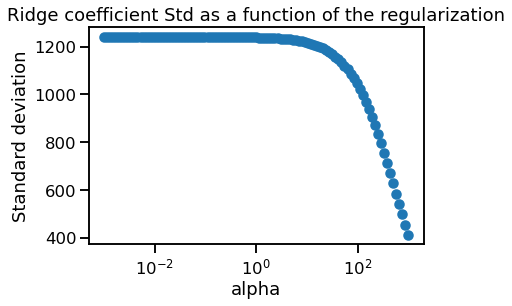

In [93]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(alphas, coefs)
ax.set_xscale("log")

plt.xlabel("alpha")
plt.ylabel("Standard deviation")
plt.title("Ridge coefficient Std as a function of the regularization")
plt.axis("tight")
plt.show()

In [95]:
alphas=np.logspace(-3, 3, num=101)

ridge = Pipeline(steps=[('scaler', StandardScaler()), 
                            ('ridge', RidgeCV(alphas=alphas))])

cv_results = cross_validate(ridge, new_data, target,
    cv=10, return_estimator=True, return_train_score=True, n_jobs=2)

In [99]:
for estimator in cv_results['estimator']:
    print(estimator[-1].alpha_)

331.13112148259074
331.13112148259074
288.40315031266056
331.13112148259074
331.13112148259074
331.13112148259074
288.40315031266056
331.13112148259074
63.0957344480193
331.13112148259074


# Second part

In [100]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [122]:
data.head(5)

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

logrec = Pipeline(steps=[('scaler', StandardScaler()), 
                            ('LogRec', LogisticRegression())])
dummy = DummyClassifier(strategy="most_frequent")

In [114]:
cv_logrec = cross_validate(logrec, data, target,
    cv=10, n_jobs=2, return_estimator=True)

cv_dummy = cross_validate(dummy, data, target,
    cv=10, n_jobs=2)

In [112]:
[cv_logrec['test_score'] > cv_dummy['test_score']]

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True])]

In [142]:
cv_logrec['estimator'][0][-1].coef_

array([[0.52204276, 2.4667774 , 0.30602977, 0.53963505]])

In [145]:
coefs_list = [np.squeeze(estimator[-1].coef_) for estimator in cv_logrec['estimator']]

In [149]:
coefs = pd.DataFrame(coefs_list, columns=data.columns)
coefs

,age,capital-gain,capital-loss,hours-per-week
0,0.522043,2.466777,0.306030,0.539635
1,0.526067,2.406533,0.308178,0.541824
2,0.524257,2.455923,0.308124,0.543843
3,0.520375,2.450482,0.309170,0.534597
4,0.519259,2.512010,0.304243,0.546715
5,0.521732,2.441632,0.304017,0.541286
6,0.520235,2.473723,0.306893,0.536374
7,0.523958,2.445321,0.308326,0.538253
8,0.516454,2.405087,0.308394,0.535121
9,0.516737,2.450489,0.301394,0.535532


# Third part

In [158]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [174]:
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [161]:
data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [179]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

ct = make_column_transformer(
    (StandardScaler(),
    make_column_selector(dtype_exclude=object)),
    (OneHotEncoder(),
    make_column_selector(dtype_include=object)))

processed_data = ct.fit_transform(data)
log_reg = LogisticRegression(max_iter=500)

In [180]:
cv_results_cat = cross_validate(log_reg, processed_data, target,
    cv=10, n_jobs=2)

In [188]:
[cv_results_cat['test_score'] > cv_logrec['test_score']]

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True])]

In [191]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [194]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [195]:
model.fit(data, target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [197]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["one-hot-encoder"]
                             .get_feature_names_out(categorical_columns)).tolist()
feature_names += numerical_columns
feature_names

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Fa

In [208]:
cat_coefs = pd.DataFrame(model[-1].coef_, columns=feature_names)
print(cat_coefs.transpose().to_string())

                                                   0
workclass_ ?                               -0.135697
workclass_ Federal-gov                      0.672042
workclass_ Local-gov                        0.039535
workclass_ Never-worked                    -0.176991
workclass_ Private                          0.185518
workclass_ Self-emp-inc                     0.329711
workclass_ Self-emp-not-inc                -0.354589
workclass_ State-gov                       -0.131599
workclass_ Without-pay                     -0.443880
education_ 10th                            -0.834969
education_ 11th                            -0.738624
education_ 12th                            -0.316718
education_ 1st-4th                         -1.236777
education_ 5th-6th                         -0.946046
education_ 7th-8th                         -1.242744
education_ 9th                             -1.031686
education_ Assoc-acdm                       0.593955
education_ Assoc-voc                        0.